<a href="https://colab.research.google.com/github/DaPanda03/rrlyrae/blob/main/Science_Fair_2023_Vijay_and_Yusuf_RR_Lyrae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating Trends in Absolute Magnitudes of RR Lyrae Variable Stars

In [ ]:
# run command to connect to local system
#jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

Installing all Packages

In [ ]:
#run this twice
!pip install -q condacolab
!pip install pandas
!pip install matplotlib
!pip install seaborn
import condacolab
condacolab.install()

Importing all Files

In [ ]:
condacolab.check()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

✨🍰✨ Everything looks OK!


In [ ]:
table = pd.read_csv("Science Fair RR Lyrae Datasheet - Sheet1.csv")
table = table.dropna()
table["absolutemag"] = (5 * np.log10(table['dist']) - 5 - table["mean_vmag"]) * -1
table.head()

,index,source_id,asassn_name,variable_type,parallax,mean_vmag,dist,period,parallax_error,absolutemag
0,0,505934,ASASSN-V J174610.37-152619.8,RRAB,0.1123,16.05,5527.884,0.618020,0.0387,2.337205
1,1,504046,ASASSN-V J191731.48+353617.0,RRAB,0.1132,14.66,6680.728,0.605930,0.0162,0.535881
2,2,456284,ASASSN-V J062011.28+675148.4,RRC,0.0929,15.13,6573.140,0.329610,0.0259,1.041136
3,3,AP39443219,ASASSN-V J075015.49-645653.0,RRC,0.5339,13.68,1758.571,0.357864,0.0106,2.454200
4,4,464409,ASASSN-V J183205.91-494042.9,RRAB,0.0887,14.74,6070.996,0.527170,0.0325,0.823700


## Basic Machine Learning Model with Random Forest Regressor


In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
def get_fingerprint(index):
  rtarray = [table["dist"][index]]
  rtarray.append(table["mean_vmag"][index])
  #return array1
  return np.array(rtarray)
type(table["index"].apply(get_fingerprint))
table["fingerprint"] = table["index"].apply(get_fingerprint)
table.head()
X = table["fingerprint"].values.tolist()
y = table["absolutemag"].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

R2 score is  0.996642782299333
mean absolute error is  0.023150636578330268
mean_squared_error is  0.0045932828637022995


Text(0, 0.5, 'Predicted values')

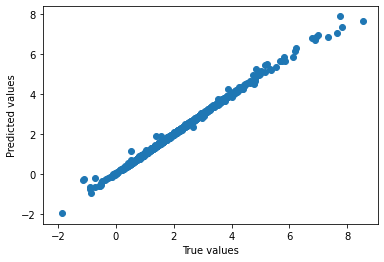

In [ ]:
print("R2 score is ",metrics.r2_score(y_predict,y_test))
print("mean absolute error is ",metrics.mean_absolute_error(y_predict,y_test))
print("mean_squared_error is ",metrics.mean_squared_error(y_predict,y_test))
x = np.arange(-2, 5, 10)

plt.scatter(y_test,y_predict)
plt.plot(x,x,color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")

## Machine Learning model to compare Period with Absolute Magnitude

In [ ]:
def get_periodprint(index):
  rtarray = [table["period"][index]]
  rtarray.append(table["period"][index])
  return np.array(rtarray)
table["periodprint"] = table["index"].apply(get_periodprint)
X1 = table["periodprint"].values.tolist()
y1 = table["absolutemag"].values.tolist()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X1_train, y1_train)
y1_predict = model.predict(X1_test)

print("R2 score is ",metrics.r2_score(y1_predict,y1_test))
print("mean absolute error is ",metrics.mean_absolute_error(y1_predict,y1_test))
print("mean_squared_error is ",metrics.mean_squared_error(y1_predict,y1_test))

x1 = np.arange(-2, 5, 10)

plt.scatter(y1_test,y1_predict)
plt.plot(x1,x1,color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")

There is clearly no correlation between Period and Absolute Magnitude for RR Lyrae Variable Stars

## Machine Learning model to compare Apparent Magnitude and Parallax with Absolute Magnitude

R2 score is  0.7093248221047466
mean absolute error is  0.3006274044775881
mean_squared_error is  0.3571670420619686


Text(0, 0.5, 'Predicted values')

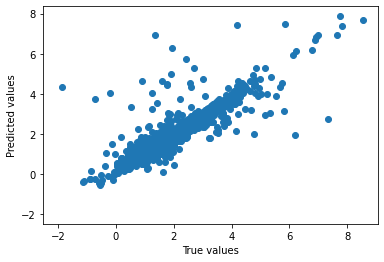

In [ ]:
def get_paramagprint(index):
  rtarray = [table["parallax"][index]]
  rtarray.append(table["mean_vmag"][index])
  #return array1
  return np.array(rtarray)
type(table["index"].apply(get_paramagprint))
table["paramagprint"] = table["index"].apply(get_paramagprint)
table.head()
X2 = table["paramagprint"].values.tolist()
y2 = table["absolutemag"].values.tolist()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train2, y_train2)
y_predict2 = model.predict(X_test2)

print("R2 score is ",metrics.r2_score(y_predict2,y_test2))
print("mean absolute error is ",metrics.mean_absolute_error(y_predict2,y_test2))
print("mean_squared_error is ",metrics.mean_squared_error(y_predict2,y_test2))
x = np.arange(-2, 5, 10)

plt.scatter(y_test2,y_predict2)
plt.plot(x,x,color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")

## Seperate table into subtypes of RR Lyrae

In [ ]:
rrab = pd.read_csv("Science Fair RRAB Lyrae Datasheet - Sheet1.csv")
rrab = rrab.dropna()
rrab["absolutemag"] = (5 * np.log10(rrab['dist']) - 5 - rrab["mean_vmag"]) * -1

rrc = pd.read_csv("Science Fair RRC Lyrae Datasheet - Sheet1.csv")
rrc = rrc.dropna()
rrc["absolutemag"] = (5 * np.log10(rrc['dist']) - 5 - rrc["mean_vmag"]) * -1

rrd = pd.read_csv("Science Fair RRD Lyrae Datasheet - Sheet1.csv")
rrd = rrd.dropna()
rrd["absolutemag"] = (5 * np.log10(rrd['dist']) - 5 - rrd["mean_vmag"]) * -1

In [ ]:
rrab.head()

,index,source_id,asassn_name,variable_type,parallax,mean_vmag,dist,period,parallax_error,absolutemag
0,0,505934,ASASSN-V J174610.37-152619.8,RRAB,0.1123,16.05,5527.884,0.61802,0.0387,2.337205
1,1,504046,ASASSN-V J191731.48+353617.0,RRAB,0.1132,14.66,6680.728,0.60593,0.0162,0.535881
2,2,464409,ASASSN-V J183205.91-494042.9,RRAB,0.0887,14.74,6070.996,0.52717,0.0325,0.823700
3,3,467939,ASASSN-V J044831.66+261108.7,RRAB,0.2480,16.01,3204.071,0.47256,0.0407,3.481489
4,4,454574,ASASSN-V J190716.49-292957.3,RRAB,0.1379,14.46,4925.933,0.56074,0.0366,0.997557


In [ ]:
rrc.head()

,index,source_id,asassn_name,variable_type,parallax,mean_vmag,dist,period,parallax_error,absolutemag
0,0,456284,ASASSN-V J062011.28+675148.4,RRC,0.0929,15.13,6573.1400,0.329610,0.0259,1.041136
1,1,AP39443219,ASASSN-V J075015.49-645653.0,RRC,0.5339,13.68,1758.5710,0.357864,0.0106,2.454200
2,2,AP12996825,ASASSN-V J223054.90+484124.0,RRC,1.4763,11.17,657.0154,0.288408,0.0181,2.082122
3,3,AP47329164,ASASSN-V J162906.98-761608.0,RRC,0.7880,12.44,1217.6950,0.264165,0.0181,2.012307
4,4,450850,ASASSN-V J172133.04+035003.3,RRC,0.1501,13.98,4907.2900,0.376360,0.0268,0.525791


In [ ]:
rrd.head()

,index,source_id,asassn_name,variable_type,parallax,mean_vmag,dist,period,parallax_error,absolutemag
0,0,AP28504059,ASASSN-V J185410.32-211713.4,RRD,0.7181,14.90,1323.036,0.582920,0.0336,4.292142
1,1,493116,ASASSN-V J185252.22-224437.9,RRD,0.1553,14.70,4692.497,0.460867,0.0290,1.342980
2,2,460279,ASASSN-V J195422.53-120925.8,RRD,0.0871,14.75,6357.740,0.460880,0.0249,0.733486
3,3,491008,ASASSN-V J165037.55-192451.0,RRD,0.1167,15.65,5332.960,0.470065,0.0379,2.015158
4,4,460288,ASASSN-V J195104.31-140946.9,RRD,0.1842,14.85,4203.820,0.587509,0.0269,1.731779


# Parallax & Apparent Magnitude for RRAB subtypes

R2 score is  0.7164486591151453
mean absolute error is  0.30794707776410996
mean_squared_error is  0.37156236524605835


Text(0, 0.5, 'Predicted values')

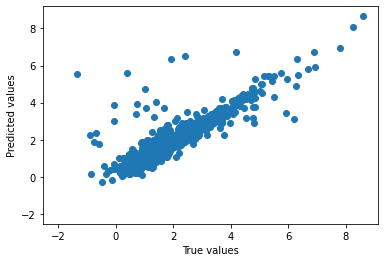

In [ ]:
def get_paramagprint_rrab(index):
  rtarray = [rrab["parallax"][index]]
  rtarray.append(rrab["mean_vmag"][index])
  #return array1
  return np.array(rtarray)
rrab["paramagprint"] = rrab["index"].apply(get_paramagprint_rrab)
rrab.head()
X2 = rrab["paramagprint"].values.tolist()
y2 = rrab["absolutemag"].values.tolist()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train2, y_train2)
y_predict2 = model.predict(X_test2)

print("R2 score is ",metrics.r2_score(y_predict2,y_test2))
print("mean absolute error is ",metrics.mean_absolute_error(y_predict2,y_test2))
print("mean_squared_error is ",metrics.mean_squared_error(y_predict2,y_test2))
x = np.arange(-2, 5, 10)

plt.scatter(y_test2,y_predict2)
plt.plot(x,x,color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")

# Parallax & Apparent Magnitude for RRC subtypes

R2 score is  0.5948337255738001
mean absolute error is  0.2828767995034733
mean_squared_error is  0.4348827623415587


Text(0, 0.5, 'Predicted values')

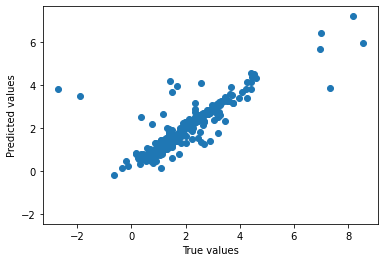

In [ ]:
def get_paramagprint_rrc(index):
  rtarray = [rrc["parallax"][index]]
  rtarray.append(rrc["mean_vmag"][index])
  #return array1
  return np.array(rtarray)
rrc["paramagprint"] = rrc["index"].apply(get_paramagprint_rrc)
rrc.head()
X2 = rrc["paramagprint"].values.tolist()
y2 = rrc["absolutemag"].values.tolist()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train2, y_train2)
y_predict2 = model.predict(X_test2)

print("R2 score is ",metrics.r2_score(y_predict2,y_test2))
print("mean absolute error is ",metrics.mean_absolute_error(y_predict2,y_test2))
print("mean_squared_error is ",metrics.mean_squared_error(y_predict2,y_test2))
x = np.arange(-2, 5, 10)

plt.scatter(y_test2,y_predict2)
plt.plot(x,x,color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")

# Parallax & Apparent for RRD subtypes

R2 score is  0.5948337255738001
mean absolute error is  0.2828767995034733
mean_squared_error is  0.4348827623415587


Text(0, 0.5, 'Predicted values')

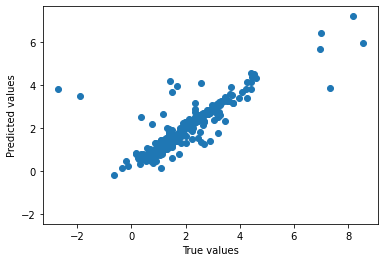

In [ ]:
def get_paramagprint_rrc(index):
  rtarray = [rrc["parallax"][index]]
  rtarray.append(rrc["mean_vmag"][index])
  #return array1
  return np.array(rtarray)
rrc["paramagprint"] = rrc["index"].apply(get_paramagprint_rrc)
rrc.head()
X2 = rrc["paramagprint"].values.tolist()
y2 = rrc["absolutemag"].values.tolist()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train2, y_train2)
y_predict2 = model.predict(X_test2)

print("R2 score is ",metrics.r2_score(y_predict2,y_test2))
print("mean absolute error is ",metrics.mean_absolute_error(y_predict2,y_test2))
print("mean_squared_error is ",metrics.mean_squared_error(y_predict2,y_test2))
x = np.arange(-2, 5, 10)

plt.scatter(y_test2,y_predict2)
plt.plot(x,x,color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")

# Period Luminosity Trend for RRAB subtypes

R2 score is  -1.6806230980895527
mean absolute error is  1.0612237140302043
mean_squared_error is  2.157233884484217


Text(0, 0.5, 'Predicted values')

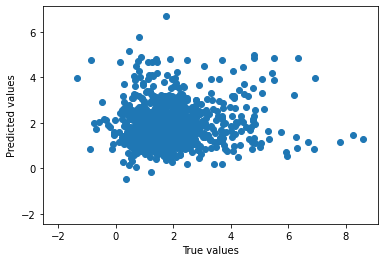

In [ ]:
def get_periodprint_rrab(index):
  rtarray = [rrab["period"][index]]
  rtarray.append(rrab["period"][index])
  return np.array(rtarray)
rrab["periodprint"] = rrab["index"].apply(get_periodprint_rrab)
X1 = rrab["periodprint"].values.tolist()
y1 = rrab["absolutemag"].values.tolist()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X1_train, y1_train)
y1_predict = model.predict(X1_test)

print("R2 score is ",metrics.r2_score(y1_predict,y1_test))
print("mean absolute error is ",metrics.mean_absolute_error(y1_predict,y1_test))
print("mean_squared_error is ",metrics.mean_squared_error(y1_predict,y1_test))

x1 = np.arange(-2, 5, 10)

plt.scatter(y1_test,y1_predict)
plt.plot(x1,x1,color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")

# Period Luminosity Trend for RRC subtypes

R2 score is  -2.027953544252166
mean absolute error is  0.9274670526976186
mean_squared_error is  1.7590578652877567


Text(0, 0.5, 'Predicted values')

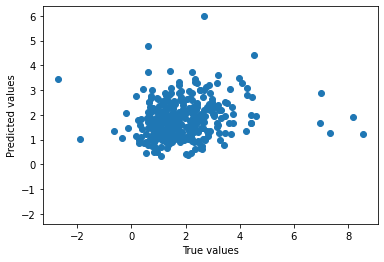

In [ ]:
def get_periodprint_rrc(index):
  rtarray = [rrc["period"][index]]
  rtarray.append(rrc["period"][index])
  return np.array(rtarray)
rrc["periodprint"] = rrc["index"].apply(get_periodprint_rrc)
X1 = rrc["periodprint"].values.tolist()
y1 = rrc["absolutemag"].values.tolist()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X1_train, y1_train)
y1_predict = model.predict(X1_test)

print("R2 score is ",metrics.r2_score(y1_predict,y1_test))
print("mean absolute error is ",metrics.mean_absolute_error(y1_predict,y1_test))
print("mean_squared_error is ",metrics.mean_squared_error(y1_predict,y1_test))

x1 = np.arange(-2, 5, 10)

plt.scatter(y1_test,y1_predict)
plt.plot(x1,x1,color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")

# Period Luminosity Trend for RRD subtypes

R2 score is  -2.36530850579093
mean absolute error is  0.9384285179277406
mean_squared_error is  1.5866183243990322


Text(0, 0.5, 'Predicted values')

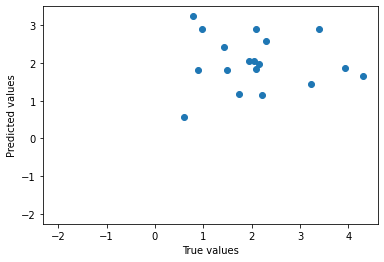

In [ ]:
def get_periodprint_rrd(index):
  rtarray = [rrd["period"][index]]
  rtarray.append(rrd["period"][index])
  return np.array(rtarray)
rrd["periodprint"] = rrd["index"].apply(get_periodprint_rrd)
X1 = rrd["periodprint"].values.tolist()
y1 = rrd["absolutemag"].values.tolist()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X1_train, y1_train)
y1_predict = model.predict(X1_test)

print("R2 score is ",metrics.r2_score(y1_predict,y1_test))
print("mean absolute error is ",metrics.mean_absolute_error(y1_predict,y1_test))
print("mean_squared_error is ",metrics.mean_squared_error(y1_predict,y1_test))

x1 = np.arange(-2, 5, 10)

plt.scatter(y1_test,y1_predict)
plt.plot(x1,x1,color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")